<p style="font-size:300%; background-color:gray; color:white; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Tarea 6. Operaciones Morfológicas en Imagenes</p>
<p style="font-size:240%; background-color:gray; color:white; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Jefferson Javier Hernández Panqueba</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: jejhernandezpa@unal.edu.co</p>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
<br>Jaime Andrés Castillo León</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email:jacastillol@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>12 de Marzo de 2018</p>

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Contenido </h1>

<ul style="font-size:140%; line-height : 25px;">
  <li>Implementar y evaluar el algoritmo de dilatación direccional</li>
  <li>Implementar y evaluar el algoritmo de adelgazamiento por morfología matemática</li>
</ul>


<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

In [2]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
cv2.getStructuringElement()
cv2.erode()
cv2.dilate()
a = np.array([[0,0,0,0,0,0,0,0],
             [],
             [],
             [],
             [],
             [],
             [],
             []])

In [43]:
# reflection 
# translation (z) : z is a vector
# erode
def erode(A, B, origen):
    ar, ac = A.shape
    br, bc = B.shape
    eA = np.zeros_like(A)
    extA = np.zeros((ar+2*br,ac+2*bc),np.uint8)
    extA[br:br+ar,bc:bc+ac] = A
    orir, oric = origen
    for i in range(0,ar):
        for j in range(0,ac):
            idx = np.arange(i+br-orir,i+2*br-orir)
            idy = np.arange(j+bc-oric,j+2*bc-oric)
            if np.prod(B*(extA[idx,idy]))==1:
                eA[i,j] = 1
    return eA

# dilate
def dilate(A, B, origen):
    ar, ac = A.shape
    br, bc = B.shape
    dA = np.zeros_like(A)
    extA = np.zeros((ar+2*br,ac+2*bc),np.uint8)
    extA[br:br+ar,bc:bc+ac] = A
    orir, oric = origen
    for i in range(0,ar):
        for j in range(0,ac):
            idx = np.arange(i+orir+1,i+br+orir+1)
            idy = np.arange(j+oric+1,j+bc+oric+1)
            if np.sum(B[-1::-1,-1::-1]*extA[idx,idy])>0:
                dA[i,j] = 1
    return dA

#
A = np.zeros((4,4),np.uint8)
A[0:3,1] = 1;A[3,0] = A[2,2] = 1;
B = np.ones((1,2),np.uint8)
dA = dilate(A,B,(0,0))
dAcv2 = cv2.dilate(A,B)
edA = erode(dA,B,(0,0))
edA2 = 1-dilate(1-dA,B[-1::-1,-1::-1],(0,1))
edAcv2 = cv2.erode(dA,B,anchor=(0,0))

print(A)
print(dA)
print(dAcv2)
print(edA)
print(edA2)
print(edAcv2)

[[0 1 0 0]
 [0 1 0 0]
 [0 1 1 0]
 [1 0 0 0]]
[[0 1 1 0]
 [0 1 1 0]
 [0 1 1 1]
 [1 1 0 0]]
[[0 1 1 0]
 [0 1 1 0]
 [0 1 1 1]
 [1 1 0 0]]
[[0 1 0 0]
 [0 1 0 0]
 [0 1 1 0]
 [1 0 0 0]]
[[0 1 0 0]
 [0 1 0 0]
 [0 1 1 1]
 [1 0 0 0]]
[[0 1 0 0]
 [0 1 0 0]
 [0 1 1 1]
 [1 0 0 0]]


[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 1 0 0 0 0 1 1]]


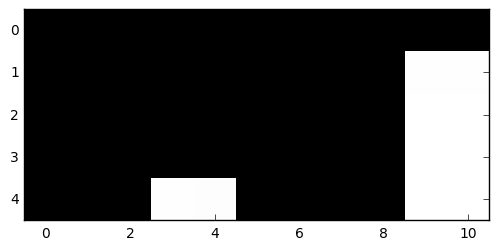

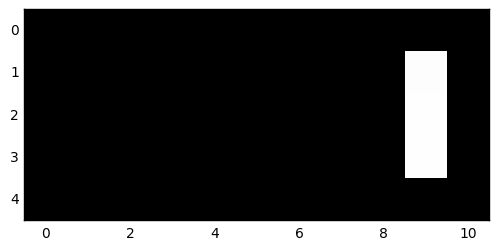

In [24]:
A = np.zeros((5,11),dtype='uint8')
A[4,3:5] = 1; A[1:,9:] = 1
B1 = np.array([[-1,-1,-1],[0,1,0],[1,1,1]],dtype='uint8')

hmA = cv2.morphologyEx(A,cv2.MORPH_HITMISS,B1)
print(hmA)
aA = A*(1-hmA)


plt.imshow(A,cmap='gray',interpolation='none')
plt.show()

plt.imshow(aA,cmap='gray',interpolation='none')
plt.show()